In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
path ='../../../Data_preprocessing/RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
# path ='../../../Data_preprocessing/RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'

data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.979436,0.927694,0.847157,0.927951,0.954266,0.702499,0.924324,0.947513,0.977068,0.974450
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.942790,0.904091,0.916965,0.984643,0.951518,0.702499,0.985716,0.926652,0.977485,0.952089
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.899643,0.895334,0.962866,0.971061,0.941744,0.891154,0.966061,0.927933,0.938855,0.929364
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.930375,0.920000,0.906820,0.965345,0.989037,0.890711,0.953759,0.925267,0.984474,0.978449
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552


In [3]:
data = data[['RNA_ID','ImmunoPhenotype_Desert','ImmunoPhenotype_Excluded','ImmunoPhenotype_Infiltrated','ImmunoPhenotype_NA','PFS','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
data.head()


,RNA_ID,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA,PFS,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,0,0,1,0,5.490411,0.898634,0.673138,0.909389,0.758691,...,0.682591,0.640214,0.842022,1.000000,0.625993,0.912529,0.971557,0.587310,0.863040,0.974497
1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,0,1,0,0,1.249315,0.898634,0.673138,0.909006,0.758691,...,0.682591,0.713747,0.726861,0.694015,0.625993,0.903036,0.666040,0.587310,0.863040,0.958581
2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,0,0,0,1,5.654795,0.898634,0.673138,0.969120,0.954047,...,0.682591,0.763067,0.747376,0.869025,0.625993,0.898032,0.888588,0.587310,0.863040,0.980335
3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,0,0,1,0,1.216438,0.894698,0.654761,0.936171,0.877898,...,0.669220,0.481977,0.797865,0.931136,0.624581,0.873870,0.826337,0.564337,0.855268,0.945490
4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,0,0,1,0,2.860274,0.896845,0.663879,0.958324,0.746849,...,0.677685,0.745493,0.772651,0.902087,0.613038,0.896762,0.767579,0.552830,0.857563,0.948794


In [4]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,0:34] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

     ImmunoPhenotype_Desert  ImmunoPhenotype_Excluded  \
0                         0                         0   
1                         0                         1   
2                         0                         0   
3                         0                         0   
4                         0                         0   
..                      ...                       ...   
139                       0                         0   
140                       0                         0   
141                       0                         0   
142                       0                         0   
143                       0                         0   

     ImmunoPhenotype_Infiltrated  ImmunoPhenotype_NA  AC005307.1  ATP5G2P1  \
0                              1                   0    0.898634  0.673138   
1                              0                   0    0.898634  0.673138   
2                              0                   1    0.898634  0.673138   
3  

In [5]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTrain))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 115


In [6]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [7]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000000, random_state=125)

In [8]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5478260869565217


In [9]:
import shap
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
import ssl

In [10]:
explainer = shap.KernelExplainer(model.predict_proba, XTrain)
shap_values = explainer.shap_values(XTest)

Using 115 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


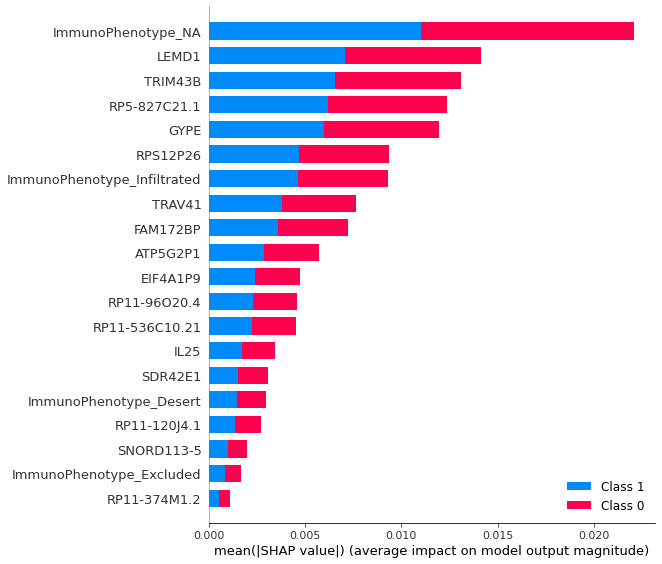

In [11]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = XTest.columns)
#shap_values[0] = NR, shap_values[1]=SR, shap_values[2]=R

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0][0], features = XTest.columns)

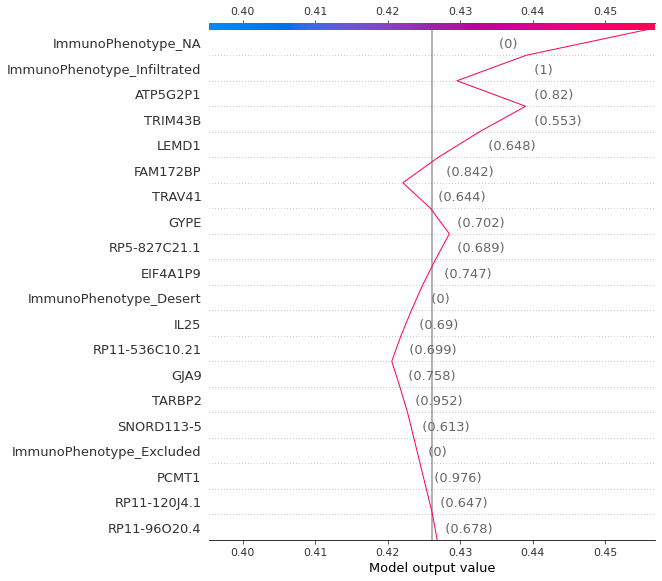

In [13]:
shap.decision_plot(explainer.expected_value[1], shap_values[0][0], features = XTest, feature_names = XTest.columns.tolist())

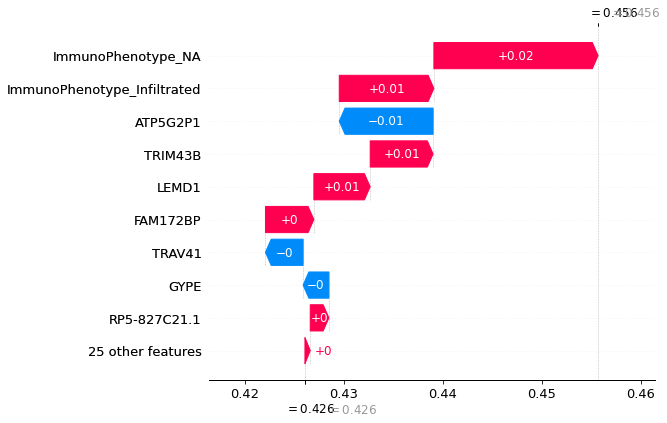

In [14]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[0][0], feature_names = XTest.columns)

In [15]:
shap.force_plot(explainer.expected_value[1], shap_values[0], XTest)